**Import Libraries**

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

**Load Dataset**

In [2]:
df=pd.read_csv("titanic3.csv")

In [3]:
df.head(10) # Display the first 10 rows

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [4]:
df.columns # Display the columns names

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

**Data Cleaning**

In [5]:
df.isnull().sum() # Display the null values in all columns 

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [6]:
df.info() # Display columns information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [7]:
df.drop(columns=['ticket','cabin', 'boat', 'body' ,'home.dest'] , inplace=True) # drop Unnecessary columns

In [8]:
df.head(10)

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,151.5500,S
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,26.5500,S
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,77.9583,S
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,0.0000,S
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,51.4792,S
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,49.5042,C


In [9]:
df.isnull().sum()

pclass        0
survived      0
name          0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      2
dtype: int64

In [10]:
df.loc[:, 'age'] = df['age'].fillna(df['age'].median()) # fill age missing values with median


In [11]:
df.fillna({'embarked': df['embarked'].mode()[0] if not df['embarked'].mode().empty else 'S'}, inplace=True)
# fill embarked missing values with most common value

In [12]:
df.loc[:, 'fare'] = df['fare'].fillna(df['fare'].median()) # fill fare missing values with median

In [13]:
df['fare'] = df['fare'].round(2) # convert Fare with Two Decimal Places 


In [14]:
bins = [0, 12, 18, 30, 50, 80]  # Define age ranges
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)
# convert age into age_group

In [15]:
df.isnull().sum() # Checking null values

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
fare         0
embarked     0
age_group    0
dtype: int64

In [16]:
df.duplicated().sum() # check for duplicate values

np.int64(0)

**Cleaned Dataset**

In [17]:
df.head(10)

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,age_group
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,211.34,S,Young Adult
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,151.55,S,Child
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,151.55,S,Child
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,151.55,S,Young Adult
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,151.55,S,Young Adult
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,26.55,S,Adult
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,77.96,S,Senior
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,0.00,S,Adult
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,51.48,S,Senior
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,49.50,C,Senior


In [18]:
df.to_csv('cleaned_titanic.csv', index=False) # convert cleaned dataset into csv file


# Exploratory Data Analysis (EDA)

**Univariate Analysis (One Variable at a Time)**

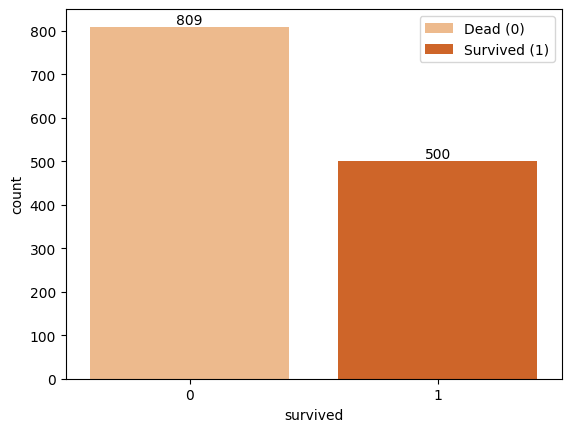

In [19]:
ax = sns.countplot(x='survived', hue='survived', data=df, palette="Oranges", legend=False)

# Add count labels to both bars
for container in ax.containers:
    ax.bar_label(container)

plt.legend(["Dead (0)", "Survived (1)"])
plt.show()


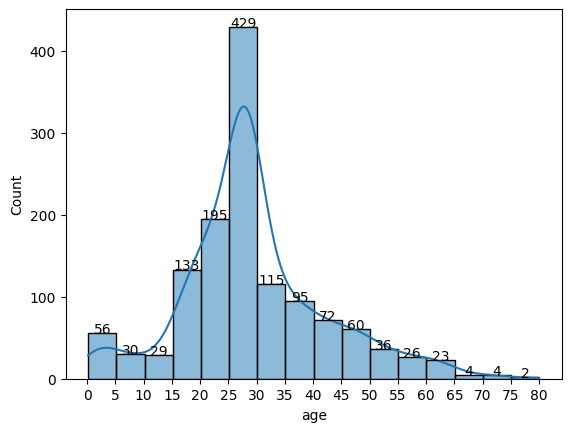

In [20]:
ax = sns.histplot(df['age'], binwidth=5, kde=True)
plt.xticks(range(0, int(df['age'].max()) + 5, 5))
[ax.text(p.get_x() + p.get_width()/2, p.get_height(), int(p.get_height()), ha='center') for p in ax.patches]
plt.show()

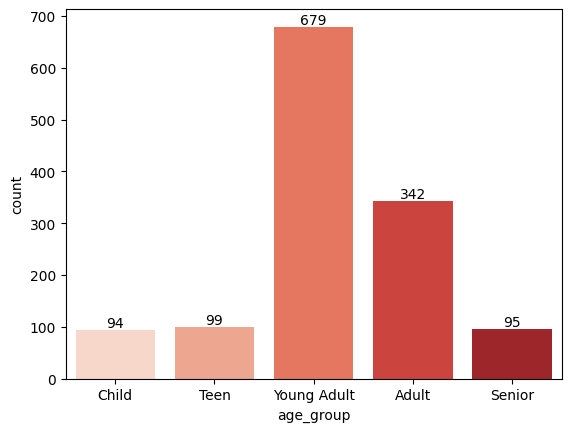

In [21]:
ax = sns.countplot(x='age_group', hue='age_group', data=df, palette="Reds", legend=False)

# Add count labels to both bars
for container in ax.containers:
    ax.bar_label(container)
plt.show()

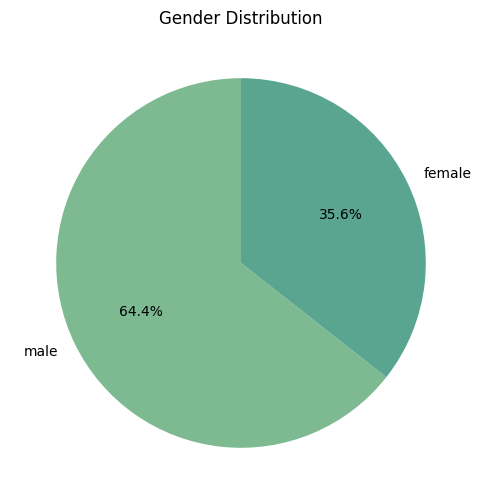

In [22]:
plt.figure(figsize=(6, 6))
df['sex'].value_counts().plot.pie(autopct="%1.1f%%", colors=sns.color_palette("crest"), startangle=90)
plt.title("Gender Distribution")
plt.ylabel("")  # Hide y-label for better visualization
plt.show()



**Bivariate Analysis (Relationships Between Two Variables)**

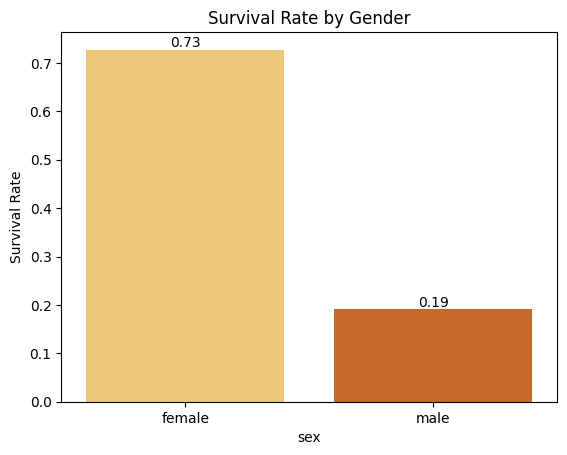

In [23]:
# Calculate survival rate by gender
survival_rate = df.groupby("sex")["survived"].mean().reset_index()

# Plot bar chart
ax = sns.barplot(x="sex",hue="sex" , y="survived", data=survival_rate, palette="YlOrBr")

# Add labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f")  # Show rate with 2 decimal places

plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.show()



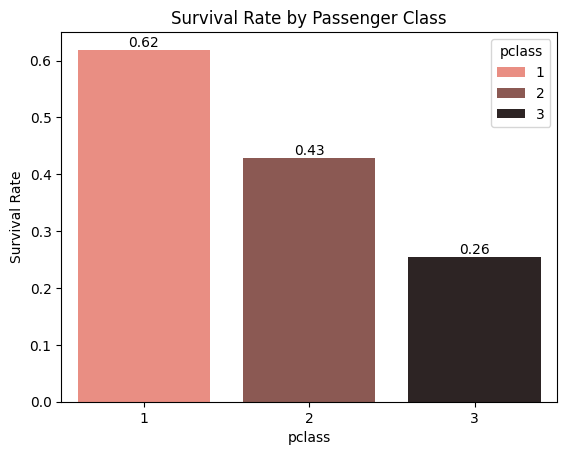

In [24]:
# Calculate survival rate by Passanger Class
survival_rate = df.groupby("pclass")["survived"].mean().reset_index()

# Plot bar chart
ax = sns.barplot(x="pclass",hue="pclass" , y="survived", data=survival_rate, palette="dark:salmon_r")

# Add labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f")  # Show rate with 2 decimal places

plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Rate")
plt.show()


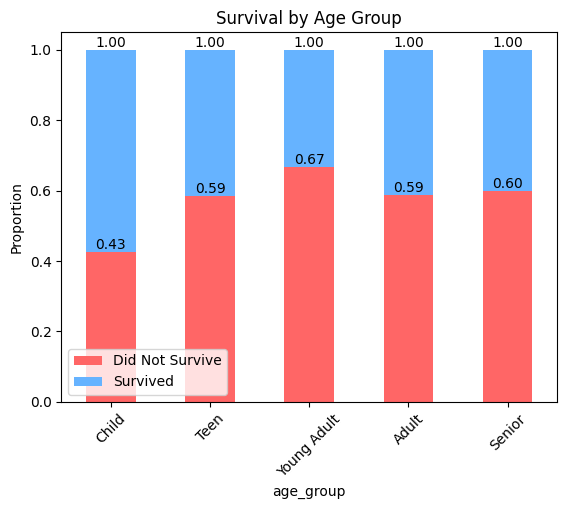

In [25]:
age_survival = pd.crosstab(df["age_group"], df["survived"], normalize="index")  

ax = age_survival.plot(kind="bar", stacked=True, color=["#ff6666", "#66b3ff"])  
plt.xticks(rotation=45)
plt.ylabel("Proportion")
plt.title("Survival by Age Group")
plt.legend(["Did Not Survive", "Survived"])

# Add proportion labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f")

plt.show()



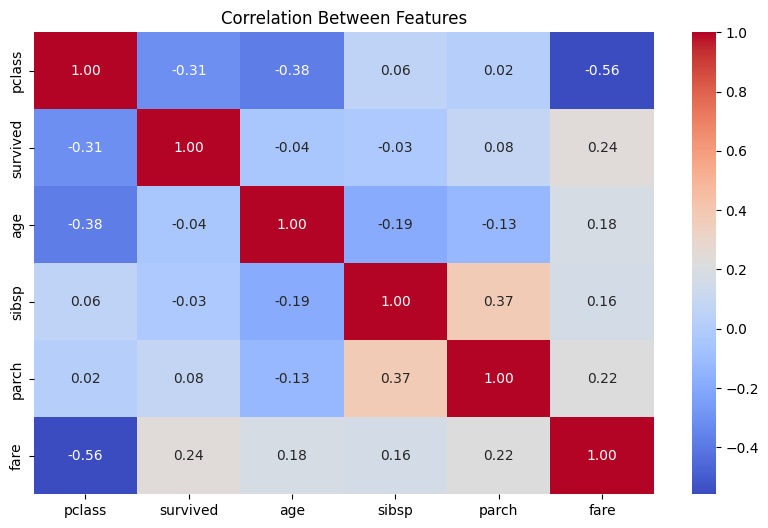

In [26]:
plt.figure(figsize=(10,6))

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=["number"])

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Features")
plt.show()


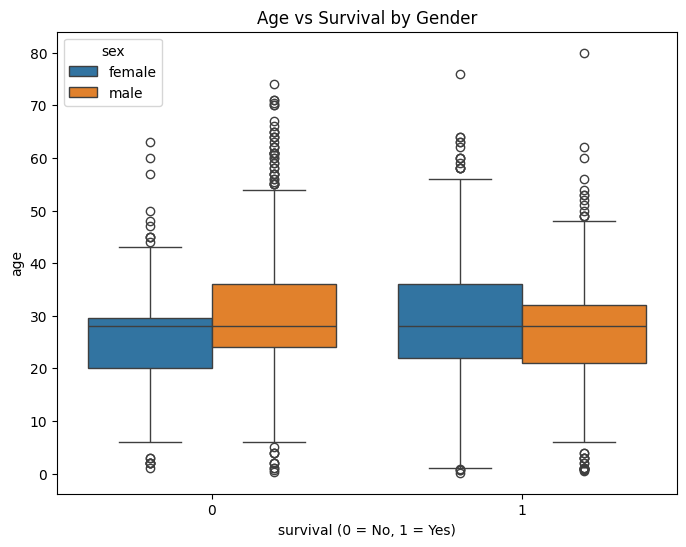

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='survived', y='age', hue='sex', data=df)
plt.title("Age vs Survival by Gender")
plt.xlabel("survival (0 = No, 1 = Yes)")
plt.ylabel("age")
plt.legend(title="sex")
plt.show()


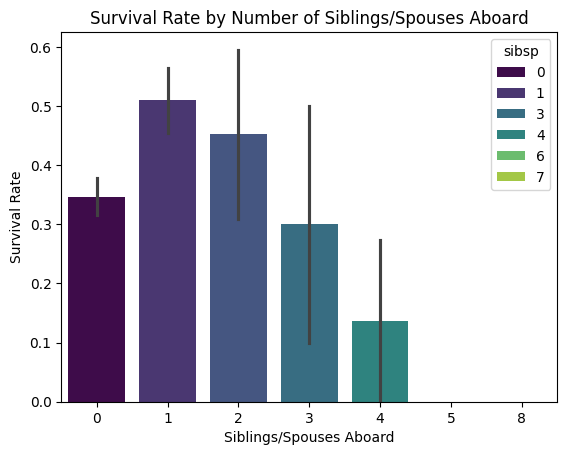

In [37]:
sns.barplot(x="sibsp", y="survived", hue="sibsp" , data=df, palette="viridis")  
plt.title("Survival Rate by Number of Siblings/Spouses Aboard")  
plt.xlabel("Siblings/Spouses Aboard")  
plt.ylabel("Survival Rate")  
plt.show()

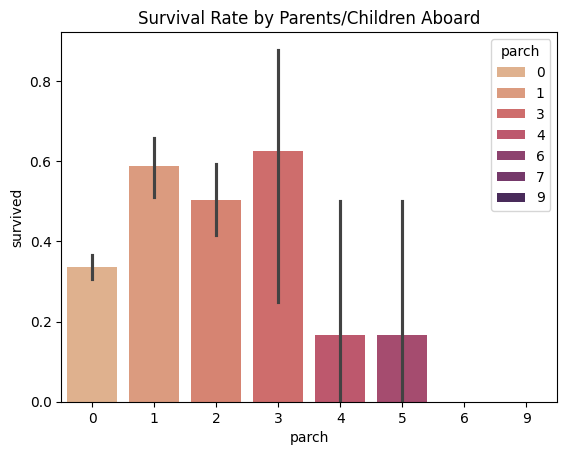

In [45]:
sns.barplot(x="parch", y="survived", hue="parch", data=df, palette="flare")
plt.title("Survival Rate by Parents/Children Aboard")
plt.show()

# Conclusion

**Our analysis shows that female passengers and first-class travelers had the highest survival rates. Children also had a higher chance of survival, likely due to priority rescue. Passengers who paid higher fares were more likely to survive. Additionally, those with one sibling/spouse or three parents/children aboard had better survival chances. These insights highlight the key factors influencing survival on the Titanic.**